### Importing Libraries

In [21]:
import requests
from bs4 import BeautifulSoup

### `Scrapping` the first 200 pages from website

In [22]:
AirCraft=[]
Seat_Type=[]
Route=[]
Date_flown=[]
Type_of_traveller=[]
Seat_Comfort=[]
Cabin_staff_service=[]
Ground_Service=[]
value_for_money=[]
Recommended=[]
Food_And_Bevarages=[]
inflight_entertainment=[]
wifi_and_connectivity=[]
Desc=[]
ReviewRating=[]
Author=[]
Country=[]
Date=[]
ReviewContent=[]
for i in range(1,201):
    url=f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/"
    page=requests.get(url)
    
    container=BeautifulSoup(page.text,'html.parser') 
    soup=container.find_all("div",class_="body")
    for i in soup:
        div=i.find("div",class_="review-stats")
        table=div.find("table",class_="review-ratings")
        # Aircraft
        td=table.find("td",class_="review-rating-header aircraft")
        if td is not None:
            value=td.find_next_sibling("td",class_="review-value")
            AirCraft.append(value.text)
        else:
            AirCraft.append(None)
        # Seat Type
        td=table.find("td",class_="review-rating-header cabin_flown")
        if td is not None:
            value=td.find_next_sibling("td",class_="review-value")
            Seat_Type.append(value.text)
        else:
            Seat_Type.append(None)
        # Route
        
        td=table.find("td",class_="review-rating-header route")
        if td is not None:
            value=td.find_next_sibling("td",class_="review-value")
            Route.append(value.text)
        else:
            Route.append(None)
        # Date flown 
        td=table.find("td",class_="review-rating-header date_flown")
        if td is not None:
            value=td.find_next_sibling("td",class_="review-value")
            Date_flown.append(value.text)
        else:
            Date_flown.append(None)
        # Type of traveller
        
        td=table.find("td",class_="review-rating-header type_of_traveller")
        if td is not None:
            value=td.find_next_sibling("td",class_="review-value")
            Type_of_traveller.append(value.text)
        else:
            Type_of_traveller.append(None)

        # Seat comfort
        td=table.find("td",class_="review-rating-header seat_comfort")
        if td is not None:
            value=td.find_next_sibling("td",class_="review-rating-stars")
            filled_stars = value.find_all('span', class_='star fill')
            rating = len(filled_stars)
            Seat_Comfort.append(rating)
        else:
            Seat_Comfort.append(None)
        
        # Cabin_Staff_Services
        td=table.find("td",class_="review-rating-header cabin_staff_service")
        if td is not None:
            value=td.find_next_sibling("td",class_="review-rating-stars")
            filled_stars = value.find_all('span', class_='star fill')
            rating = len(filled_stars)
            Cabin_staff_service.append(rating)
        else:
            Cabin_staff_service.append(None)

    
        # Ground Service
        td=table.find("td",class_="review-rating-header ground_service")
        if td is not None:
            value=td.find_next_sibling("td",class_="review-rating-stars")
            filled_stars = value.find_all('span', class_='star fill')
            rating = len(filled_stars)
            Ground_Service.append(rating)
        else:
            Ground_Service.append(None)

        #value_for_money
        td=table.find("td",class_="review-rating-header value_for_money")
        if td is not None:
            value=td.find_next_sibling("td",class_="review-rating-stars")
            filled_stars = value.find_all('span', class_='star fill')
            rating = len(filled_stars)
            value_for_money.append(rating)
        else:
            value_for_money.append(None)

        # recommended
        tn=table.find("td",class_="review-value rating-no")
        ts=table.find("td",class_="review-value rating-yes")
        if tn is not None:
            value=tn.text
            Recommended.append(value)
        elif ts is not None:
            Recommended.append(ts.text)
        else:
            Recommended.append("N/A")

        # Food and Bevarages
        td=table.find("td",class_="review-rating-header food_and_beverages")
        if td is not None:
            value=td.find_next_sibling("td",class_="review-rating-stars")
            filled_stars = value.find_all('span', class_='star fill')
            rating = len(filled_stars)
            Food_And_Bevarages.append(rating)
        else:
            Food_And_Bevarages.append(None)

        # inflight_entertainment
        td=table.find("td",class_="review-rating-header inflight_entertainment")
        if td is not None:
            value=td.find_next_sibling("td",class_="review-rating-stars")
            filled_stars = value.find_all('span', class_='star fill')
            rating = len(filled_stars)
            inflight_entertainment.append(rating)
        else:
            inflight_entertainment.append(None)
        # wifi_and_connectivity
        td=table.find("td",class_="review-rating-header wifi_and_connectivity")
        if td is not None:
            value=td.find_next_sibling("td",class_="review-rating-stars")
            filled_stars = value.find_all('span', class_='star fill')
            rating = len(filled_stars)
            wifi_and_connectivity.append(rating)
        else:
            wifi_and_connectivity.append(None)

    soup=container.find_all("div",{"itemprop":"reviewRating"})
    if soup is not None:
        for i in soup:
            rating=i.find_all("span",itemprop="ratingValue")
            for j in rating:
                ReviewRating.append(j.text)
    else:
        ReviewRating.append(None)

    # DESCRIPTION
    soup=container.find_all("div",class_="body")
    if soup is not None:
        for i in soup:
            h2=i.find_all("h2")
            for j in h2:
                Desc.append(j.text)
    else:
        Desc.append(None)
    
    # AUTHOR
    soup=container.find_all("h3")
    if soup is not None:
        for i in soup:
            name=i.span.text.split("\n")
            Author.append(name)
    else:
        Author.append(None)

    # COUNTRY
    soup=container.find_all("h3")
    if soup is not None:
        for i in soup:
            Country.append(i.span.next_sibling.text.strip(" ()"))
    else:
        Country.append(None)

    # DATE
    soup=container.find_all("time")
    if soup is not None:
        for i in soup:
            Date.append(i.text)
    else:
        Date.append(None)

    # REVIEW
    soup=container.find_all("div",class_="text_content")
    if soup is not None:
        for i in soup:
            ReviewContent.append(i.text)
    else:
        ReviewContent.append(None)     

In [23]:
column=[Author,Desc,ReviewRating,Country,Date,AirCraft,Seat_Type,Route,Date_flown,Type_of_traveller,Seat_Comfort,Cabin_staff_service,Ground_Service,value_for_money,Recommended,Food_And_Bevarages,inflight_entertainment,wifi_and_connectivity]

In [24]:
for i in column:
    print(len(i))

2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000


In [25]:
AirCraft[2:10]

['Boeing 777-200',
 'A350',
 None,
 'Boeing 777',
 'A320',
 'Boeing 777',
 'A320',
 None]

### Converting into a dataframe 

In [14]:
import pandas as pd

In [26]:
df=pd.DataFrame({"Author":Author,
                "Description":Desc,
                "ReviewRating": ReviewRating,
                "Country":Country,
                "Review_Date":Date,
                "AirCraft":AirCraft,
                "Seat_Type":Seat_Type,
                "Route":Route,
                "Date_flown":Date_flown,
                "Type_of_traveller":Type_of_traveller,
                "Seat_Comfort":Seat_Comfort,
                "Cabin_staff_service":Cabin_staff_service,
                "Ground_Service": Ground_Service,
                "Value_For_Money":value_for_money,
                "Recommended":Recommended,
                "Food_And_Bevarages":Food_And_Bevarages,
                "Inflight_Entertainment":inflight_entertainment,
                "Wifi_and_Connectivity":wifi_and_connectivity  })

In [50]:
df=pd.read_csv("customer_reviews.csv")

In [51]:
df.head()

,Unnamed: 0,Author,Description,ReviewRating,Country,Review_Date,AirCraft,Seat_Type,Route,Date_flown,Type_of_traveller,Seat_Comfort,Cabin_staff_service,Ground_Service,Value_For_Money,Recommended,Food_And_Bevarages,Inflight_Entertainment,Wifi_and_Connectivity
0,0,"['', '4 reviews', '', '', '', 'Mike Flynn']","""Flight attendants welcoming""",7,United Kingdom,3rd April 2024,Boeing 787,Business Class,London Heathrow to Mumbai,March 2024,Business,3.0,5.0,4.0,3,yes,3.0,4.0,NaN
1,1,"['', 'E Dodson']","""the service was appalling""",3,United Kingdom,2nd April 2024,Boeing 777-200,Business Class,Doha to London Heathrow,March 2024,Couple Leisure,3.0,1.0,2.0,1,no,1.0,2.0,1.0
2,2,"['', 'David Williams']","""service was slow and unfriendly""",4,United Kingdom,2nd April 2024,Boeing 777-200,Business Class,Doha to London Heathrow,March 2024,Couple Leisure,5.0,1.0,5.0,3,no,1.0,5.0,1.0
3,3,"['', '11 reviews', '', '', '', 'C Down']","""a really lovely flight""",8,United Kingdom,28th March 2024,A350,Business Class,London Heathrow to São Paulo,March 2024,Solo Leisure,4.0,4.0,4.0,4,yes,5.0,5.0,NaN
4,4,"['', 'Robert Walls']","""travelling with British Airways so stressful""",1,United Kingdom,28th March 2024,NaN,Economy Class,London Heathrow to Nice,March 2024,Couple Leisure,4.0,3.0,2.0,1,no,NaN,NaN,NaN


In [52]:
df.shape

(2000, 19)

In [ ]:
df.to_excel('customer_reviews.xlsx', sheet_name='MySheet', index=False)

In [54]:
df['Seat_Type'].value_counts()

Seat_Type
Economy Class      1119
Business Class      635
Premium Economy     172
First Class          74
Name: count, dtype: int64

In [55]:
df['Type_of_traveller'].value_counts()

Type_of_traveller
Couple Leisure    662
Solo Leisure      614
Business          443
Family Leisure    278
Name: count, dtype: int64

In [56]:
df.to_csv('customer_reviews.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2000 non-null   int64  
 1   Author                  2000 non-null   object 
 2   Description             2000 non-null   object 
 3   ReviewRating            2000 non-null   int64  
 4   Country                 2000 non-null   object 
 5   Review_Date             2000 non-null   object 
 6   AirCraft                1211 non-null   object 
 7   Seat_Type               2000 non-null   object 
 8   Route                   1997 non-null   object 
 9   Date_flown              2000 non-null   object 
 10  Type_of_traveller       1997 non-null   object 
 11  Seat_Comfort            1891 non-null   float64
 12  Cabin_staff_service     1879 non-null   float64
 13  Ground_Service          1933 non-null   float64
 14  Value_For_Money         2000 non-null   

In [58]:
df['Country'].value_counts()

Country
United Kingdom           1205
United States             264
Canada                     68
Australia                  61
Germany                    42
                         ... 
Vietnam                     1
Saint Kitts and Nevis       1
Ukraine                     1
Ecuador                     1
Luxembourg                  1
Name: count, Length: 68, dtype: int64

In [59]:
df.isnull().sum()

Unnamed: 0                   0
Author                       0
Description                  0
ReviewRating                 0
Country                      0
Review_Date                  0
AirCraft                   789
Seat_Type                    0
Route                        3
Date_flown                   0
Type_of_traveller            3
Seat_Comfort               109
Cabin_staff_service        121
Ground_Service              67
Value_For_Money              0
Recommended                  0
Food_And_Bevarages         359
Inflight_Entertainment     853
Wifi_and_Connectivity     1512
dtype: int64

In [60]:
df['AirCraft'].value_counts()

AirCraft
A320                       256
Boeing 777                 157
A380                       103
Boeing 747-400              83
Boeing 777-200              73
                          ... 
Boeing 777-200 and A319      1
A319 / Boeing 789            1
A320 neo                     1
A340-300, A320               1
Boeing 747 / A380            1
Name: count, Length: 140, dtype: int64

In [61]:
df['AirCraft'].fillna('Unknown', inplace=True)
df.isnull().sum()

C:\Users\ARWINDD\AppData\Local\Temp\ipykernel_17616\378245621.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AirCraft'].fillna('Unknown', inplace=True)


Unnamed: 0                   0
Author                       0
Description                  0
ReviewRating                 0
Country                      0
Review_Date                  0
AirCraft                     0
Seat_Type                    0
Route                        3
Date_flown                   0
Type_of_traveller            3
Seat_Comfort               109
Cabin_staff_service        121
Ground_Service              67
Value_For_Money              0
Recommended                  0
Food_And_Bevarages         359
Inflight_Entertainment     853
Wifi_and_Connectivity     1512
dtype: int64

In [62]:
df['Route'].fillna('Unknown', inplace=True)
df.isnull().sum()

C:\Users\ARWINDD\AppData\Local\Temp\ipykernel_17616\2990591998.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Route'].fillna('Unknown', inplace=True)


Unnamed: 0                   0
Author                       0
Description                  0
ReviewRating                 0
Country                      0
Review_Date                  0
AirCraft                     0
Seat_Type                    0
Route                        0
Date_flown                   0
Type_of_traveller            3
Seat_Comfort               109
Cabin_staff_service        121
Ground_Service              67
Value_For_Money              0
Recommended                  0
Food_And_Bevarages         359
Inflight_Entertainment     853
Wifi_and_Connectivity     1512
dtype: int64

In [63]:
most_common_type = df['Type_of_traveller'].mode()[0]
df['Type_of_traveller'].fillna(most_common_type, inplace=True)
df.isnull().sum()

C:\Users\ARWINDD\AppData\Local\Temp\ipykernel_17616\1494834966.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type_of_traveller'].fillna(most_common_type, inplace=True)


Unnamed: 0                   0
Author                       0
Description                  0
ReviewRating                 0
Country                      0
Review_Date                  0
AirCraft                     0
Seat_Type                    0
Route                        0
Date_flown                   0
Type_of_traveller            0
Seat_Comfort               109
Cabin_staff_service        121
Ground_Service              67
Value_For_Money              0
Recommended                  0
Food_And_Bevarages         359
Inflight_Entertainment     853
Wifi_and_Connectivity     1512
dtype: int64

In [64]:
round(df['Seat_Comfort'].mean(),1)

2.7

In [65]:
import math
mean_rating = df['Seat_Comfort'].mean()

# Extract the integral part of the mean rating
mean_rating_integral = math.floor(mean_rating)

# Fill null values in 'rating' column with the integral part of the mean
df['Seat_Comfort'].fillna(mean_rating_integral, inplace=True)
df['Seat_Comfort'].value_counts()

C:\Users\ARWINDD\AppData\Local\Temp\ipykernel_17616\766153809.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Seat_Comfort'].fillna(mean_rating_integral, inplace=True)


Seat_Comfort
1.0    514
3.0    462
2.0    458
4.0    349
5.0    217
Name: count, dtype: int64

In [66]:
df.isnull().sum()

Unnamed: 0                   0
Author                       0
Description                  0
ReviewRating                 0
Country                      0
Review_Date                  0
AirCraft                     0
Seat_Type                    0
Route                        0
Date_flown                   0
Type_of_traveller            0
Seat_Comfort                 0
Cabin_staff_service        121
Ground_Service              67
Value_For_Money              0
Recommended                  0
Food_And_Bevarages         359
Inflight_Entertainment     853
Wifi_and_Connectivity     1512
dtype: int64

In [67]:
mean_rating = df['Cabin_staff_service'].mean()

# Extract the integral part of the mean rating
mean_rating_integral = math.floor(mean_rating)

# Fill null values in 'rating' column with the integral part of the mean
df['Cabin_staff_service'].fillna(mean_rating_integral, inplace=True)
df['Cabin_staff_service'].value_counts()

C:\Users\ARWINDD\AppData\Local\Temp\ipykernel_17616\4170491331.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin_staff_service'].fillna(mean_rating_integral, inplace=True)


Cabin_staff_service
5.0    469
3.0    462
1.0    459
4.0    349
2.0    261
Name: count, dtype: int64

In [68]:
mean_rating = df['Ground_Service'].mean()

# Extract the integral part of the mean rating
mean_rating_integral = math.floor(mean_rating)

# Fill null values in 'rating' column with the integral part of the mean
df['Ground_Service'].fillna(mean_rating_integral, inplace=True)
df['Ground_Service'].value_counts()

C:\Users\ARWINDD\AppData\Local\Temp\ipykernel_17616\552249132.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ground_Service'].fillna(mean_rating_integral, inplace=True)


Ground_Service
1.0    666
4.0    391
3.0    361
2.0    301
5.0    281
Name: count, dtype: int64

In [69]:

mean_rating = df['Food_And_Bevarages'].mean()

# Extract the integral part of the mean rating
mean_rating_integral = math.floor(mean_rating)

# Fill null values in 'rating' column with the integral part of the mean
df['Food_And_Bevarages'].fillna(mean_rating_integral, inplace=True)
df['Food_And_Bevarages'].value_counts()

C:\Users\ARWINDD\AppData\Local\Temp\ipykernel_17616\109468920.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Food_And_Bevarages'].fillna(mean_rating_integral, inplace=True)


Food_And_Bevarages
2.0    638
1.0    620
3.0    270
4.0    258
5.0    214
Name: count, dtype: int64

In [70]:
# Inflight_Entertainment     853
# Wifi_and_Connectivity     1512
# Drop columns with a high number of null values
df.drop(columns=['Inflight_Entertainment', 'Wifi_and_Connectivity'], inplace=True)
df.isnull().sum()

Unnamed: 0             0
Author                 0
Description            0
ReviewRating           0
Country                0
Review_Date            0
AirCraft               0
Seat_Type              0
Route                  0
Date_flown             0
Type_of_traveller      0
Seat_Comfort           0
Cabin_staff_service    0
Ground_Service         0
Value_For_Money        0
Recommended            0
Food_And_Bevarages     0
dtype: int64

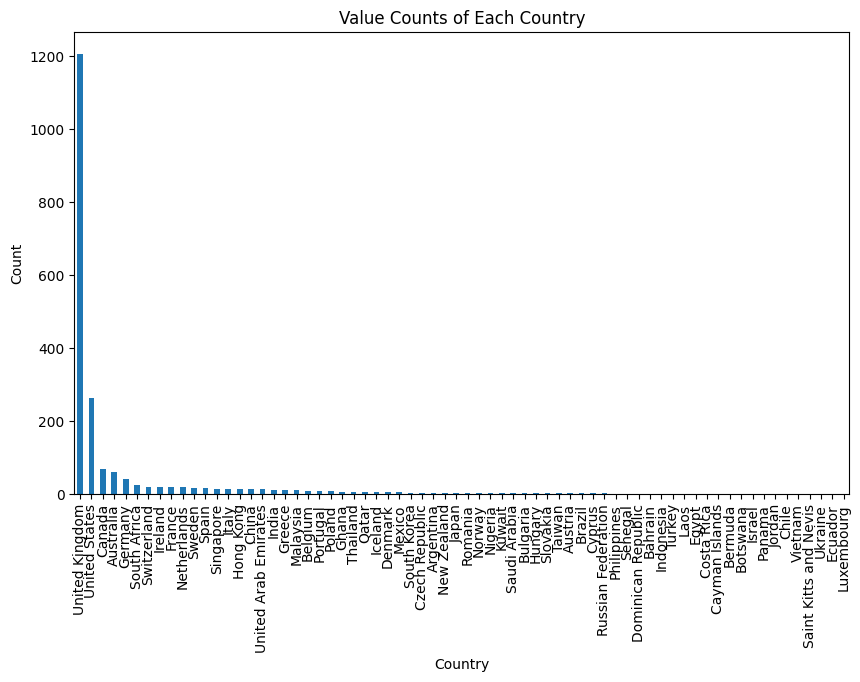

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
# 'Country' is the column containing country names

# Calculate the value counts of each country
country_counts = df['Country'].value_counts()

# Plot the value counts as a bar plot
country_counts.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Value Counts of Each Country')

# Show the plot
plt.show()


In [73]:
len(df[df['Country']=='United Kingdom'])

1205

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2000 non-null   int64  
 1   Author               2000 non-null   object 
 2   Description          2000 non-null   object 
 3   ReviewRating         2000 non-null   int64  
 4   Country              2000 non-null   object 
 5   Review_Date          2000 non-null   object 
 6   AirCraft             2000 non-null   object 
 7   Seat_Type            2000 non-null   object 
 8   Route                2000 non-null   object 
 9   Date_flown           2000 non-null   object 
 10  Type_of_traveller    2000 non-null   object 
 11  Seat_Comfort         2000 non-null   float64
 12  Cabin_staff_service  2000 non-null   float64
 13  Ground_Service       2000 non-null   float64
 14  Value_For_Money      2000 non-null   int64  
 15  Recommended          2000 non-null   o

In [76]:
df['ReviewRating'].sum()/2000


4.098